<h1 align=center> Tarea 6: Support Vector Machines y Naïve Bayes </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

<h3>Importación de librerías</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

  <font size="5"> 1. Análisis Exploratorio

  <font size="4"> 1.1 Grafico de barras de la correlación absoluta con la variable objetivo

In [9]:
df = pd.read_csv('creditcard_Tarea6.csv').drop(columns=['id'])
df = df.head(50000)


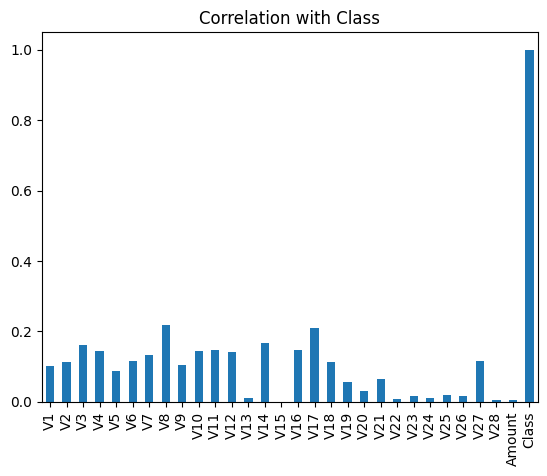

In [10]:
df.corr()['Class'].abs().plot(kind='bar')
plt.title('Correlation with Class')
plt.show()

  <font size="4"> 1.2 Distribución de las 5 características con más varianza en cada clase.

Top 5 features with highest variance:
 Amount    4.802239e+07
V13       1.297673e+00
V24       1.225239e+00
V26       1.216258e+00
V15       1.092016e+00
dtype: float64


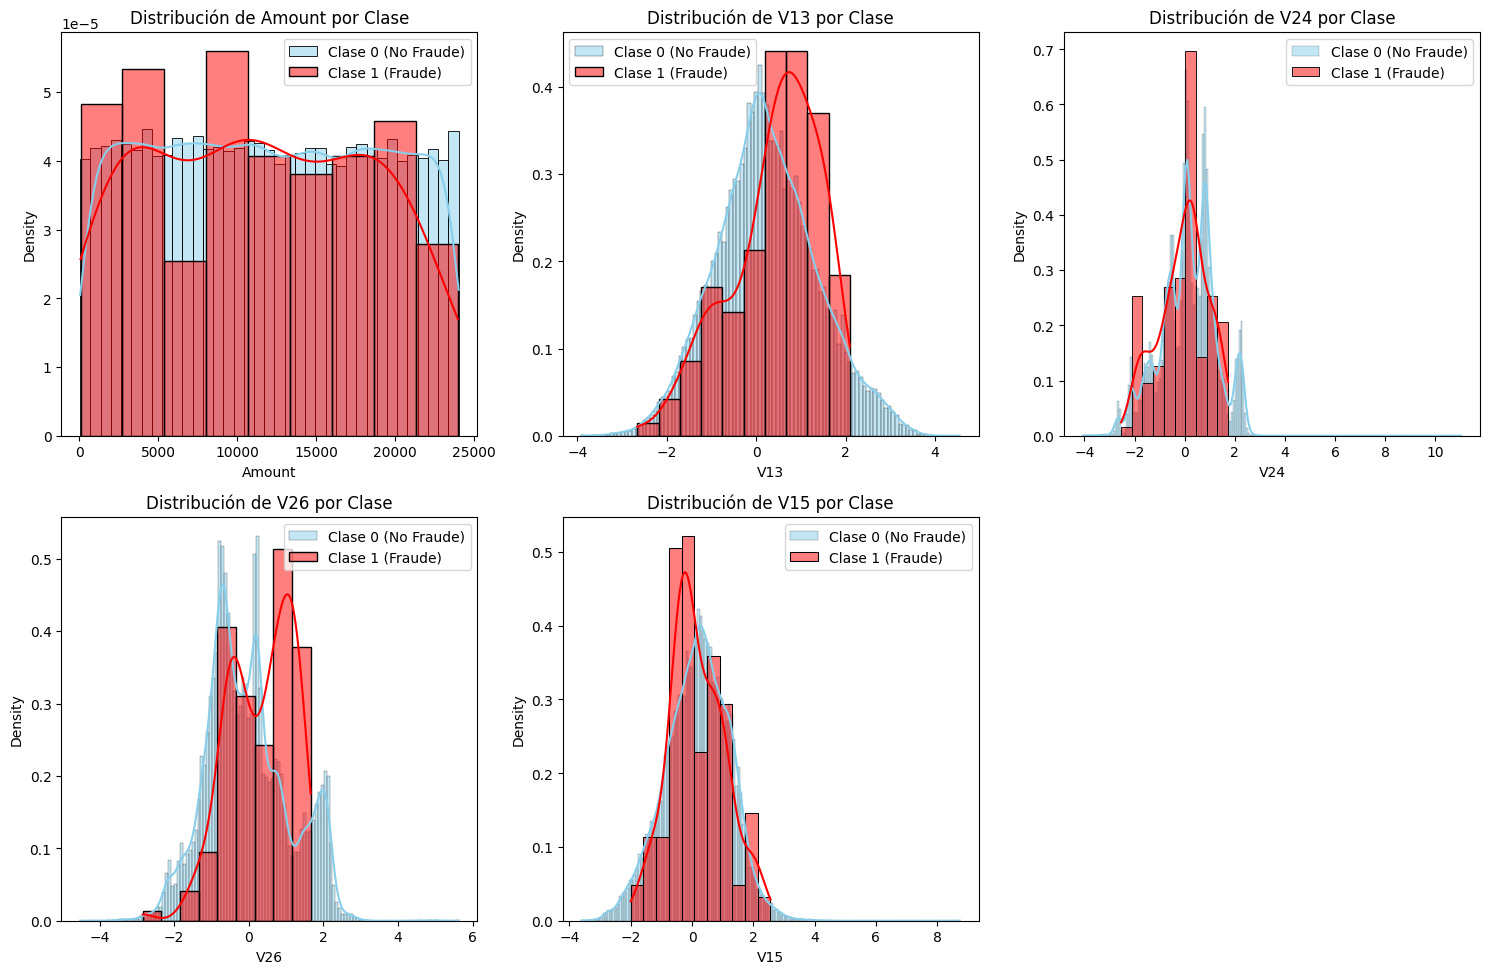

In [12]:
x = df.drop(columns=['Class'])
y = df['Class']

variance = x.var().sort_values(ascending=False).head(5)
print("Top 5 features with highest variance:\n", variance)

plt.figure(figsize=(15, 10))
# iterate over the feature NAMES (the index of the series), not the variance values
for i, feature in enumerate(variance.index):
    plt.subplot(2, 3, i + 1)
    # Histograma para la Clase 0 (No Fraude)
    sns.histplot(df[df['Class'] == 0][feature], kde=True, label='Clase 0 (No Fraude)', color='skyblue', stat="density")
    # Histograma para la Clase 1 (Fraude)
    sns.histplot(df[df['Class'] == 1][feature], kde=True, label='Clase 1 (Fraude)', color='red', stat="density")
    plt.title(f'Distribución de {feature} por Clase')
    plt.legend()
plt.tight_layout()
plt.show()

  <font size="5"> 2. Support Vector Machine

  <font size="4"> 2.1 Separacion del conjunto de datos en entrenamiento y prueba (70%/30% respectivamente)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=254, stratify=y)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14956
           1       0.00      0.00      0.00        44

    accuracy                           1.00     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.99      1.00      1.00     15000



C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

  <font size="4"> 2.2 Optimizacion de hiperparámetros "kernel" y "C". 

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
opt_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
opt_svm.fit(X_train, y_train)

print("Best parameters for SVM:", opt_svm.best_params_)

  <font size="5"> 3. Naïve Bayes

  <font size="4"> 3.1 Analisis de independencia 

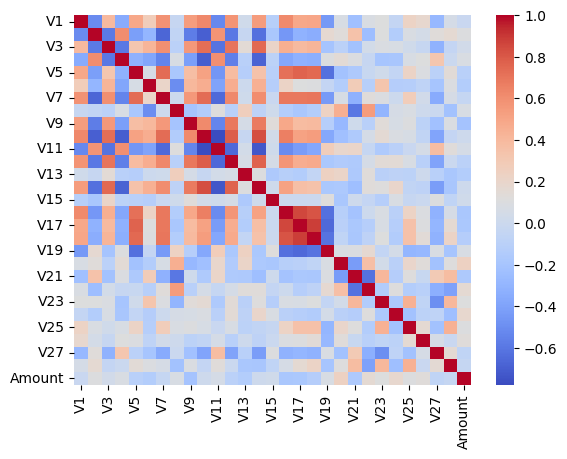

In [ ]:
# Verificamos independencia entre variables
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.show()

In [ ]:
nb = GaussianNB()
nb.fit(X_train.drop(columns=['V1','V2']), y_train) #botamos V1 Y V2 por su fuerte correlacion con
y_pred_nb = nb.predict(X_test.drop(columns=['V1','V2']))

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     85294
           1       0.95      0.87      0.91     85295

    accuracy                           0.91    170589
   macro avg       0.92      0.91      0.91    170589
weighted avg       0.92      0.91      0.91    170589



  <font size="5"> 4. Selección de Modelo

  <font size="4"> 4.1  Tabla de comparacion de modelos: F1-score, recall y precision